In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


Bad key text.latex.unicode in file /Users/emtimko17@students.desu.edu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /Users/emtimko17@students.desu.edu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/emtimko17@students.desu.edu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157

In [2]:
df = pd.read_csv("tweet_emotions.csv")
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [3]:
df = df[df['sentiment'] != "empty"]
df = df[df['sentiment'] != "boredom"]
df = df[df['sentiment'] != "anger"]
df = df[df['sentiment'] != "enthusiasm"]
df = df[df['sentiment'] != "boredom"]
df = df[df['sentiment'] != "relief"]
df = df[df['sentiment'] != "fun"]
#df = df[df['sentiment'] != "hate"]
df = df.drop("tweet_id",axis=1)

In [4]:
dir(nfx)
df['clean_content'] = df['content'].apply(nfx.remove_userhandles)
df['clean_content'] = df['clean_content'].apply(nfx.remove_userhandles)

In [5]:
#df.isnull().sum()
print(df["clean_content"].count())
df = df[df["clean_content"]!=' ']
#df[df["clean_content"]==' '].sum()
print(df["clean_content"].count())
df['sentiment'].value_counts()

34823
34758


neutral      8583
worry        8454
happiness    5208
sadness      5162
love         3841
surprise     2187
hate         1323
Name: sentiment, dtype: int64

In [6]:
print(df["clean_content"].count())
df = df.drop_duplicates(subset=["clean_content"])
print(df["clean_content"].count())
df.describe()

34758
34420


,sentiment,content,clean_content
count,34420,34420,34420
unique,7,34420,34420
top,neutral,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...
freq,8483,1,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

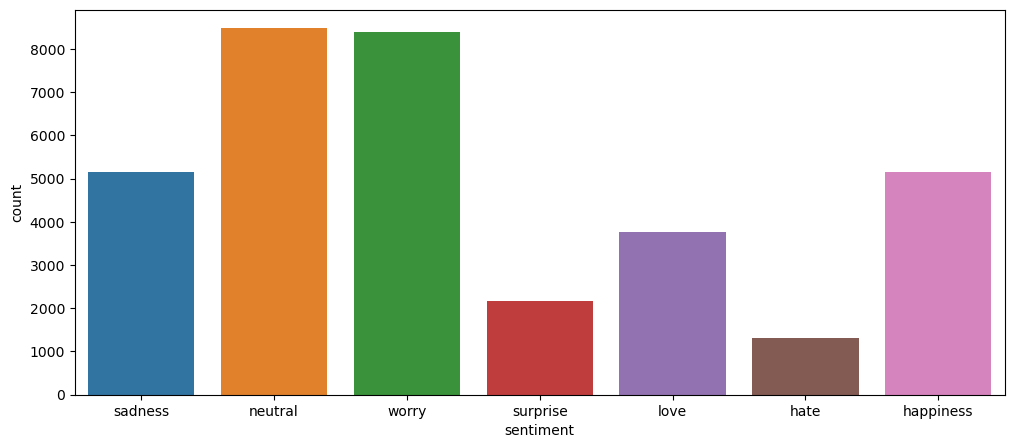

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(df, x="sentiment",ax=ax)

In [8]:
#df['sentiment'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(12,5))
# weight = {'anger':0.0028, 'boredom':0.0045, 'empty':0.0205, 'enthusiasm':0.0190, 'fun':0.0445, 'happiness':0.1304,'hate':0.0331, 'love':0.0962, 'neutral':0.2150, 'relief':0.0382, 'sadness':0.1293, 'surprise':0.0548,'worry':0.2117}

In [9]:
# setting up features and labels for prodiction
xfeatures = df['clean_content']
ylabels = df['sentiment']

In [10]:
# creating the testing/training
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.3,random_state=42)
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/Users/emtimko17@students.desu.edu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [11]:
# Check Accuracy
#pipe_lr.score(x_train,y_train)

In [12]:
# Make A Prediction
ex1 = "thats a really nice dress"
pipe_lr.predict([ex1])

array(['love'], dtype=object)

In [13]:
ex1 = "why are you like this"
pipe_lr.predict([ex1])

array(['worry'], dtype=object)

In [14]:
ex1 = "I like your dress"
pipe_lr.predict([ex1])

array(['neutral'], dtype=object)

In [15]:
ex1 = "wow you did this for me"
pipe_lr.predict([ex1])

array(['surprise'], dtype=object)

In [16]:
ex1 = "I can't beleive US lost"
pipe_lr.predict([ex1])

array(['sadness'], dtype=object)

In [17]:
ex1 = "yes I won this is amazing"
pipe_lr.predict([ex1])

array(['happiness'], dtype=object)

In [18]:
ex1 = "I am really not excited for this exam for today"
pipe_lr.predict([ex1])

array(['worry'], dtype=object)

In [19]:
ex1 = "everything is fine"
pipe_lr.predict([ex1])

array(['neutral'], dtype=object)

In [25]:
ex1 = "oh, you’re here"
pipe_lr.predict([ex1])

array(['neutral'], dtype=object)

In [21]:
ex1 = "why would you not be looking at your phone"
pipe_lr.predict([ex1])

array(['neutral'], dtype=object)

In [22]:
# To Know the classes
pipe_lr.classes_

array(['happiness', 'hate', 'love', 'neutral', 'sadness', 'surprise',
       'worry'], dtype=object)

In [23]:
#save
#df.to_csv("Emotion_tweet22.csv")